In [49]:
import pandas as pd
import pandas_ta as ta
from tqdm import tqdm

df = pd.read_csv("../data/^ixic-6mo-1h.csv")
df.Datetime = pd.to_datetime(df.Datetime, utc=True)
df=df[df.High != df.Low]
df.set_index('Datetime', inplace=True, drop=True)

In [50]:
df['EMA'] = ta.ema(df.Close, length=200)
macd = ta.macd(df.Close)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = macd.iloc[:,0], macd.iloc[:,1], macd.iloc[:,2]
df['ATR'] = ta.atr(df.High, df.Low, df.Close, length=7)
df

Open          High           Low  \
Datetime                                                              
2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
...                                 ...           ...           ...   
2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

                                  Close     Volume  Dividends  Stock Splits  \
Datetime                                                                      
2023-10-18 13:30:00+00:00  13451.814453          0        0.0           0.0   
2023-10-18 14:30:00+00:00  13415.507812  556126000        0.0           0.0   
2023-10-18 15:30:00+00:00  13398.106445  375832000        0.0           0.0   
2023-10-18 16:30:00+00:00  13418.132812  345898000        0.0           0.0   
2023-10-18 17:30:00+00:00  13379.012695  319948000        0.0           0.0   
...                                 ...        ...        ...           ...   
2024-04-17 15:30:00+00:00  15715.237305  493769000        0.0           0.0   
2024-04-17 16:30:00+00:00  15741.280273  433089000        0.0           0.0   
2024-04-17 17:30:00+00:00  15748.874023  399527000        0.0           0.0   
2024-04-17 18:30:00+00:00  15689.807617  425274000        0.0           0.0   
2024-04-17 19:30:00+00:00  15683.372070  428879000        0.0           0.0   

                                    EMA        MACD  MACD_signal   MACD_hist  \
Datetime                                                                       
2023-10-18 13:30:00+00:00           NaN         NaN          NaN         NaN   
2023-10-18 14:30:00+00:00           NaN         NaN          NaN         NaN   
2023-10-18 15:30:00+00:00           NaN         NaN          NaN         NaN   
2023-10-18 16:30:00+00:00           NaN         NaN          NaN         NaN   
2023-10-18 17:30:00+00:00           NaN         NaN          NaN         NaN   
...                                 ...         ...          ...         ...   
2024-04-17 15:30:00+00:00  16142.790400 -105.568474   -12.489515  -93.078959   
2024-04-17 16:30:00+00:00  16138.795274 -108.684552   -12.484475  -96.200078   
2024-04-17 17:30:00+00:00  16134.915461 -109.281584   -10.465205  -98.816379   
2024-04-17 18:30:00+00:00  16130.486527 -113.215820   -11.519553 -101.696267   
2024-04-17 19:30:00+00:00  16126.037627 -115.521367   -11.060080 -104.461287   

                                 ATR  
Datetime                              
2023-10-18 13:30:00+00:00        NaN  
2023-10-18 14:30:00+00:00        NaN  
2023-10-18 15:30:00+00:00        NaN  
2023-10-18 16:30:00+00:00        NaN  
2023-10-18 17:30:00+00:00        NaN  
...                              ...  
2024-04-17 15:30:00+00:00  87.330969  
2024-04-17 16:30:00+00:00  87.212398  
2024-04-17 17:30:00+00:00  80.789059  
2024-04-17 18:30:00+00:00  87.110907  
2024-04-17 19:30:00+00:00  81.959042  

[871 rows x 12 columns]

In [51]:
df.describe()

Open          High           Low         Close        Volume  \
count    871.000000    871.000000    871.000000    871.000000  8.710000e+02   
mean   15060.848559  15088.398646  15031.490716  15061.298348  4.188797e+08   
std     1058.130597   1057.311401   1055.879397   1057.335034  2.121637e+08   
min    12559.638672  12598.190430  12544.980469  12559.511719  0.000000e+00   
25%    14271.728516  14285.828613  14241.983887  14271.528809  3.716720e+08   
50%    15124.636719  15135.620117  15108.591797  15124.463867  4.367180e+08   
75%    16014.546875  16044.485840  15986.513672  16009.593262  5.116880e+08   
max    16523.082031  16538.269531  16470.300781  16505.580078  2.139866e+09   

       Dividends  Stock Splits           EMA        MACD  MACD_signal  \
count      871.0         871.0    672.000000  838.000000   838.000000   
mean         0.0           0.0  15128.425133   23.333190     0.067924   
std          0.0           0.0    798.195590   58.656332    18.541573   
min          0.0           0.0  13543.200283 -145.235377   -56.180907   
25%          0.0           0.0  14538.083070  -11.924335   -11.978800   
50%          0.0           0.0  15200.095645   27.945231    -0.533499   
75%          0.0           0.0  15884.228922   62.586887    10.219581   
max          0.0           0.0  16185.102955  163.869437    64.683041   

        MACD_hist         ATR  
count  838.000000  864.000000  
mean    23.265266   62.347447  
std     55.037864   15.395593  
min   -129.624292   30.739979  
25%     -9.423000   49.931339  
50%     28.267980   61.362644  
75%     60.153245   73.988859  
max    151.051402  118.055658

In [52]:
def ema_signal(df, current_candle, back_candles):
  df_slice = df.reset_index().copy()
  start = max(0, current_candle - back_candles)
  end = current_candle
  relevant_rows = df_slice.iloc[start:end]

  if all(relevant_rows['High'] < relevant_rows['EMA']):
    return 1
  elif all(relevant_rows['Low'] > relevant_rows['EMA']):
    return 2
  else:
    return 0

tqdm.pandas()
df.reset_index(inplace=True)
df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 5) if row.name >= 20 else 0, axis=1)
df

100%|██████████| 871/871 [00:00<00:00, 3918.23it/s]


Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close     Volume  Dividends  Stock Splits           EMA  \
0    13451.814453          0        0.0           0.0           NaN   
1    13415.507812  556126000        0.0           0.0           NaN   
2    13398.106445  375832000        0.0           0.0           NaN   
3    13418.132812  345898000        0.0           0.0           NaN   
4    13379.012695  319948000        0.0           0.0           NaN   
..            ...        ...        ...           ...           ...   
866  15715.237305  493769000        0.0           0.0  16142.790400   
867  15741.280273  433089000        0.0           0.0  16138.795274   
868  15748.874023  399527000        0.0           0.0  16134.915461   
869  15689.807617  425274000        0.0           0.0  16130.486527   
870  15683.372070  428879000        0.0           0.0  16126.037627   

           MACD  MACD_signal   MACD_hist        ATR  EMASignal  
0           NaN          NaN         NaN        NaN          0  
1           NaN          NaN         NaN        NaN          0  
2           NaN          NaN         NaN        NaN          0  
3           NaN          NaN         NaN        NaN          0  
4           NaN          NaN         NaN        NaN          0  
..          ...          ...         ...        ...        ...  
866 -105.568474   -12.489515  -93.078959  87.330969          1  
867 -108.684552   -12.484475  -96.200078  87.212398          1  
868 -109.281584   -10.465205  -98.816379  80.789059          1  
869 -113.215820   -11.519553 -101.696267  87.110907          1  
870 -115.521367   -11.060080 -104.461287  81.959042          1  

[871 rows x 14 columns]

In [54]:
# def total_signal(df, current_candle, back_candles):
#     if (ema_signal(df, current_candle, back_candles)==2 and
#         all(df.loc[current_candle - 3:current_candle - 2, "MACD"] < df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
#         all(df.loc[current_candle - 1:current_candle, "MACD"] > df.loc[current_candle - 1:current_candle, "MACD_signal"])
#         ):
#             return 2
#     if (ema_signal(df, current_candle, back_candles)==1 and
#         all(df.loc[current_candle - 3:current_candle - 2, "MACD"] > df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
#         all(df.loc[current_candle - 1:current_candle, "MACD"] < df.loc[current_candle - 1:current_candle, "MACD_signal"])
#         ):

#             return 1
#     return 0
def total_signal(df, current_candle, back_candles):
    if (all(df.loc[current_candle - 3:current_candle - 2, "MACD"] < df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
        all(df.loc[current_candle - 1:current_candle, "MACD"] > df.loc[current_candle - 1:current_candle, "MACD_signal"])):
            return 2
    if (all(df.loc[current_candle - 3:current_candle - 2, "MACD"] > df.loc[current_candle - 3:current_candle - 2, "MACD_signal"]) and
        all(df.loc[current_candle - 1:current_candle, "MACD"] < df.loc[current_candle - 1:current_candle, "MACD_signal"])):
            return 1
    return 0

df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7) if row.name != 0 else 0, axis=1)
df

SyntaxError: invalid syntax (2794878430.py, line 15)

In [36]:
df[df.TotalSignal != 0].head(20)

Datetime          Open          High           Low  \
243 2023-12-07 16:30:00+00:00  14282.223633  14347.141602  14281.886719   
391 2024-01-09 17:30:00+00:00  14860.965820  14893.946289  14851.844727   
434 2024-01-18 18:30:00+00:00  14920.546875  15034.989258  14920.546875   
513 2024-02-02 20:30:00+00:00  15652.174805  15663.918945  15627.948242   
576 2024-02-15 20:30:00+00:00  15885.294922  15911.223633  15876.909180   
604 2024-02-22 20:30:00+00:00  16042.615234  16061.657227  16031.802734   
672 2024-03-07 18:30:00+00:00  16278.713867  16309.022461  16273.970703   
695 2024-03-12 19:30:00+00:00  16255.109375  16275.366211  16244.771484   
733 2024-03-20 15:30:00+00:00  16176.203125  16180.577148  16148.536133   

            Close     Volume  Dividends  Stock Splits           EMA  \
243  14341.526367  590668000        0.0           0.0  13783.621966   
391  14861.980469  408351000        0.0           0.0  14565.028130   
434  15034.876953  428059000        0.0           0.0  14687.519786   
513  15627.948242  418628000        0.0           0.0  15094.979074   
576  15907.257812  506395000        0.0           0.0  15418.662887   
604  16038.614258  508090000        0.0           0.0  15497.358567   
672  16291.548828  480725000        0.0           0.0  15784.975742   
695  16265.270508  452757000        0.0           0.0  15861.483748   
733  16165.030273  436907000        0.0           0.0  15942.569917   

          MACD  MACD_signal  MACD_hist        ATR  EMASignal  TotalSignal  
243  16.119082    12.070283   4.048799  65.006653          2            2  
391  42.424480    33.772073   8.652407  57.216887          2            2  
434  20.295486    16.221084   4.074402  81.208365          2            2  
513  56.803821    40.695597  16.108224  69.875983          2            2  
576  22.338537    15.886244   6.452293  55.657610          2            2  
604  81.364826    58.496076  22.868750  72.993418          2            2  
672  42.966551    30.860247  12.106304  69.529778          2            2  
695  26.699332    19.462868   7.236465  66.187222          2            2  
733  14.806206     9.823119   4.983087  59.311099          2            2

In [37]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-3
    elif x['TotalSignal']==1:
        return x['High']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=1100
# dfpl = df[st:st+350]
dfpl = df
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

fig.show()

In [40]:
df

Datetime          Open          High           Low  \
0   2023-10-18 13:30:00+00:00  13439.915039  13499.502930  13421.323242   
1   2023-10-18 14:30:00+00:00  13448.098633  13448.301758  13386.589844   
2   2023-10-18 15:30:00+00:00  13415.466797  13447.771484  13394.423828   
3   2023-10-18 16:30:00+00:00  13397.604492  13439.089844  13359.598633   
4   2023-10-18 17:30:00+00:00  13419.489258  13419.581055  13355.813477   
..                        ...           ...           ...           ...   
866 2024-04-17 15:30:00+00:00  15783.606445  15783.606445  15705.765625   
867 2024-04-17 16:30:00+00:00  15713.811523  15741.323242  15654.822266   
868 2024-04-17 17:30:00+00:00  15744.334961  15773.291016  15731.041992   
869 2024-04-17 18:30:00+00:00  15749.591797  15814.849609  15689.807617   
870 2024-04-17 19:30:00+00:00  15691.283203  15733.230469  15682.182617   

            Close     Volume  Dividends  Stock Splits           EMA  \
0    13451.814453          0        0.0           0.0           NaN   
1    13415.507812  556126000        0.0           0.0           NaN   
2    13398.106445  375832000        0.0           0.0           NaN   
3    13418.132812  345898000        0.0           0.0           NaN   
4    13379.012695  319948000        0.0           0.0           NaN   
..            ...        ...        ...           ...           ...   
866  15715.237305  493769000        0.0           0.0  16142.790400   
867  15741.280273  433089000        0.0           0.0  16138.795274   
868  15748.874023  399527000        0.0           0.0  16134.915461   
869  15689.807617  425274000        0.0           0.0  16130.486527   
870  15683.372070  428879000        0.0           0.0  16126.037627   

           MACD  MACD_signal   MACD_hist        ATR  EMASignal  TotalSignal  \
0           NaN          NaN         NaN        NaN          0            0   
1           NaN          NaN         NaN        NaN          0            0   
2           NaN          NaN         NaN        NaN          0            0   
3           NaN          NaN         NaN        NaN          0            0   
4           NaN          NaN         NaN        NaN          0            0   
..          ...          ...         ...        ...        ...          ...   
866 -105.568474   -12.489515  -93.078959  87.330969          1            0   
867 -108.684552   -12.484475  -96.200078  87.212398          1            0   
868 -109.281584   -10.465205  -98.816379  80.789059          1            0   
869 -113.215820   -11.519553 -101.696267  87.110907          1            0   
870 -115.521367   -11.060080 -104.461287  81.959042          1            0   

     pointpos  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
866       NaN  
867       NaN  
868       NaN  
869       NaN  
870       NaN  

[871 rows x 16 columns]

In [42]:
dfopt = df[:]
def SIGNAL():
    return dfopt.TotalSignal

In [48]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5
    #rsi_length = 16

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=25000, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    #rsi_length=[5, 8, 10, 12, 14, 16],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_28672/2110511922.py:36: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.



  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                     870.0
Duration                                870.0
Exposure Time [%]                   30.080367
Equity Final [$]                 29727.576893
Equity Peak [$]                  29727.576893
Return [%]                          18.910308
Buy & Hold Return [%]               16.589268
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -4.980942
Avg. Drawdown [%]                   -1.128414
Max. Drawdown Duration                   67.0
Avg. Drawdown Duration                   13.6
# Trades                                  6.0
Win Rate [%]                        66.666667
Best Trade [%]                       3.481318
Worst Trade [%]                     -0.955839
Avg. Trade [%]                    

In [44]:
stats["_strategy"]

<Strategy MyStrat(slcoef=2.5,TPSLRatio=2.5)>

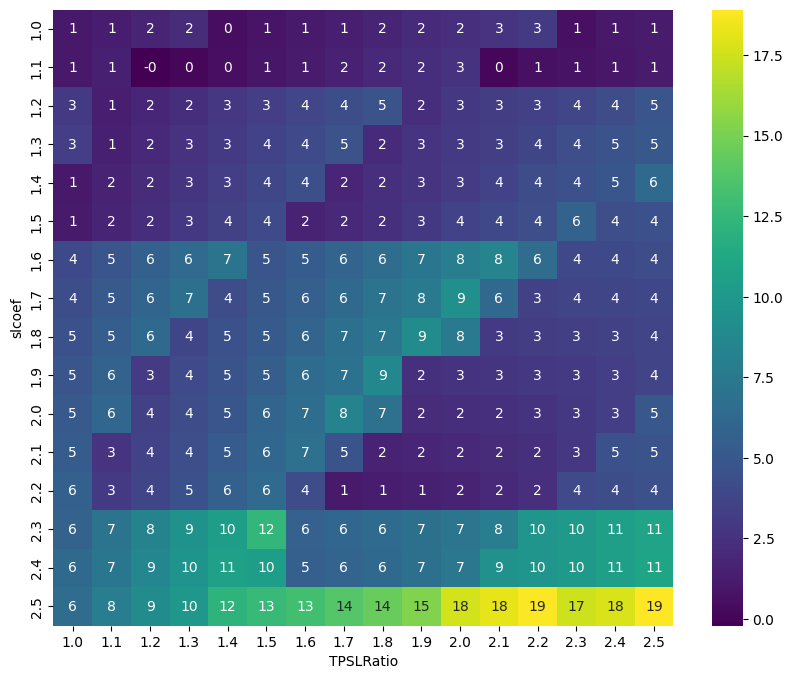

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()